In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [72]:
#Import the data

state_codes = pd.read_csv('../data/USState_Codes.csv')

# Purpose of Flight

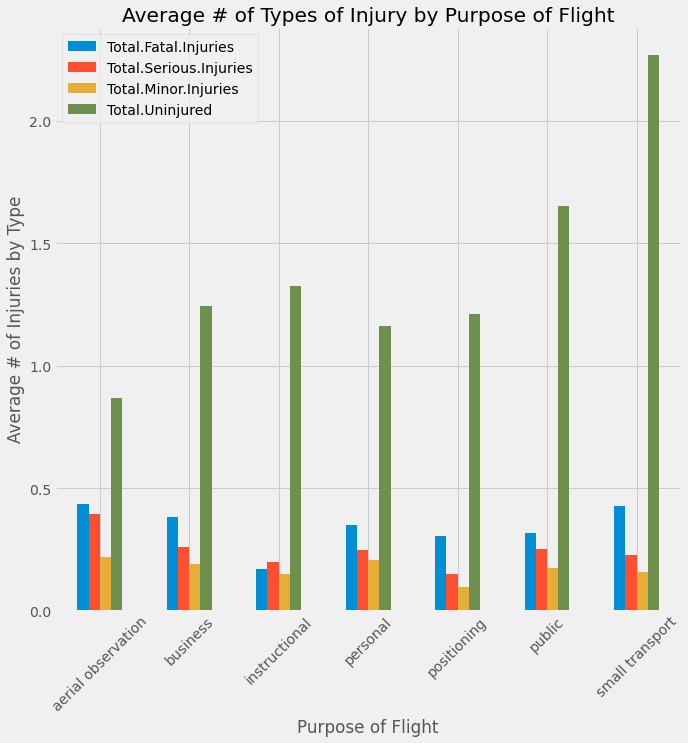

In [73]:
injury_df = df.groupby('purpose_binned').mean().filter(['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'])

#Dropping unknown from the 'purpose_binned' column of injury_df
injury_df.drop('unknown').plot(kind='bar', figsize=(10, 10))
plt.title('Average # of Types of Injury by Purpose of Flight')
plt.xticks(rotation=45)
plt.xlabel('Purpose of Flight')
plt.ylabel('Average # of Injuries by Type');

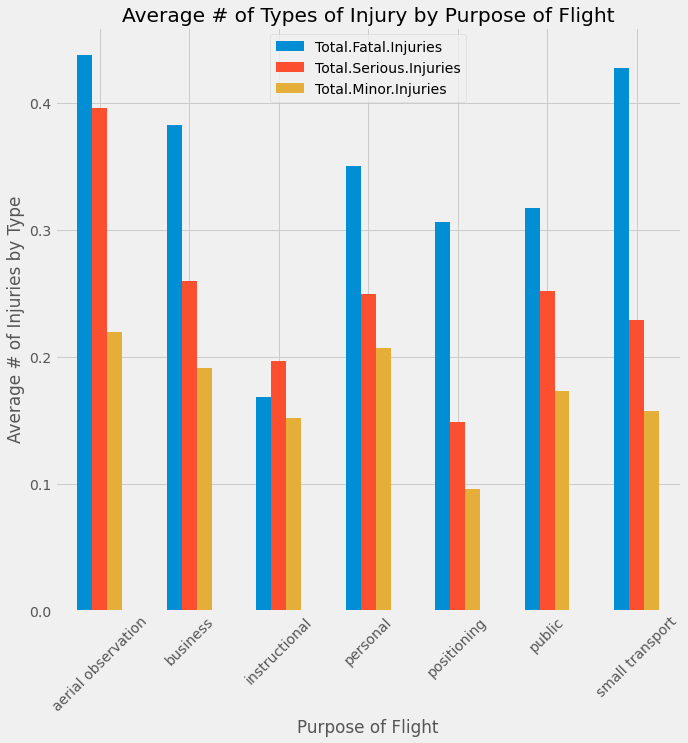

In [74]:
# Repeating the above chart, but without the non-injuries.
injury_df = df.groupby('purpose_binned').mean().filter(['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries'])

#Dropping unknown from the 'purpose_binned' column of injury_df
injury_df.drop('unknown').plot(kind='bar', figsize=(10, 10))
plt.title('Average # of Types of Injury by Purpose of Flight')
plt.xticks(rotation=45)
plt.xlabel('Purpose of Flight')
plt.ylabel('Average # of Injuries by Type');

# Makes of Planes

In [75]:
# Making a new df that only accepts the top 25 makes:
top_makes = df['Make'].value_counts().head(25).index.tolist()
top_makes_df = df[df['Make'].isin(top_makes)].copy()
top_makes_df['Make'].value_counts()

cessna                       7730
piper                        4368
beech                        1522
boeing                        456
mooney                        437
airtractor                    414
grumman                       409
cirrus                        330
bellanca                      279
aeronca                       226
maule                         225
dehavilland                   165
champion                      164
luscombe                      162
stinson                       145
north american                114
taylorcraft                   109
aero commander                 95
embraer                        85
airbus                         80
aviat aircraft inc             76
diamond aircraft ind inc       73
aviat                          68
ercoupe                        66
raytheon aircraft company      61
Name: Make, dtype: int64

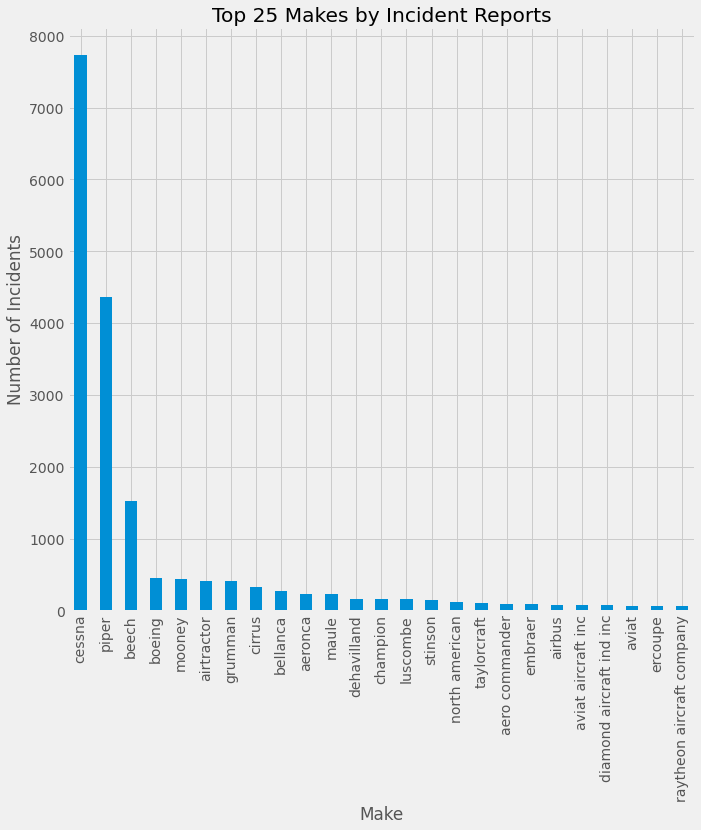

In [76]:
# make a chart of the top 25 makes
top_makes_df['Make'].value_counts().plot(kind='bar', figsize=(10, 10))
plt.title('Top 25 Makes by Incident Reports')

plt.xlabel('Make')
plt.ylabel('Number of Incidents');

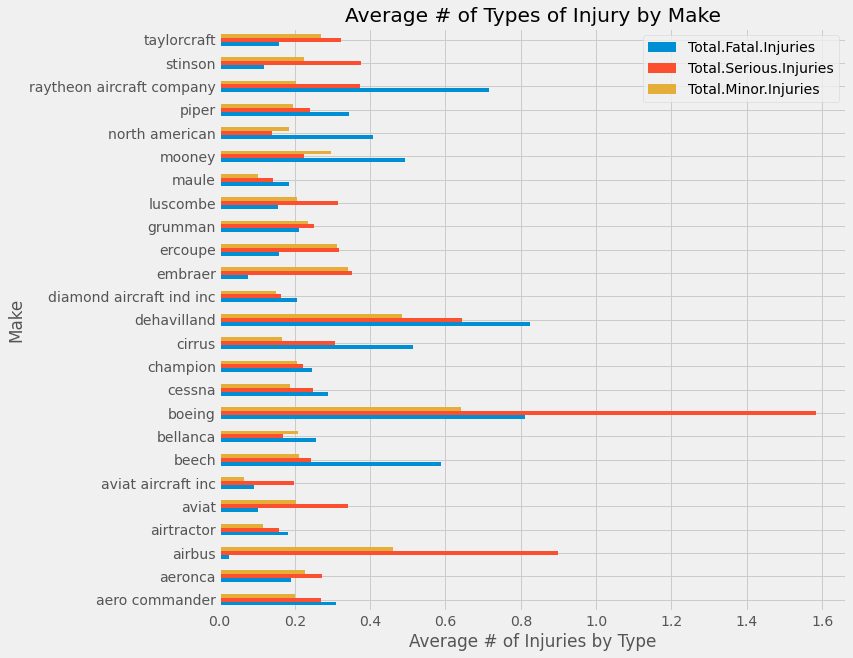

In [77]:
top_makes_df.groupby('Make').mean().filter(['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']).plot(kind='barh', figsize=(10, 10))
plt.title('Average # of Types of Injury by Make')
plt.xlabel('Average # of Injuries by Type')
plt.ylabel('Make');

# Longitudinal

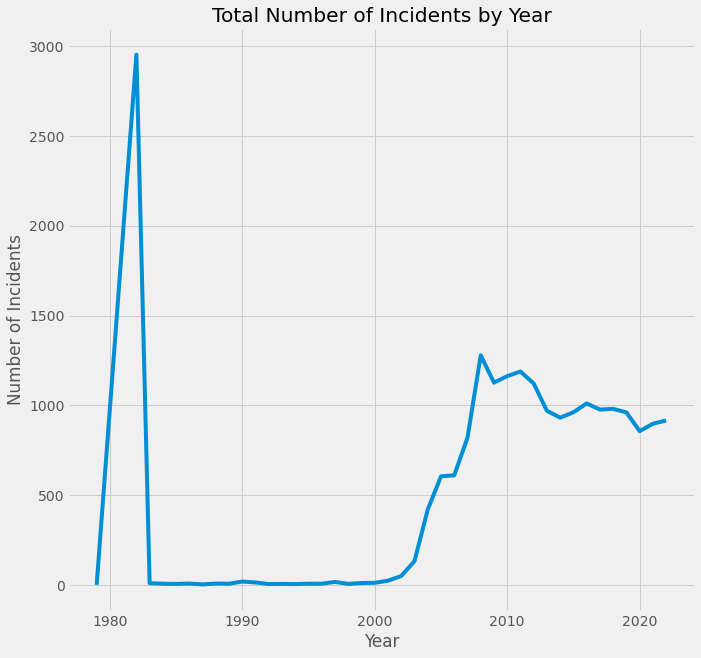

In [78]:
# Plot of total number of incidents by year

df['Year'].value_counts().sort_index().plot(kind='line', figsize=(10, 10))
plt.title('Total Number of Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents');

In [79]:

df['Investigation.Type'].value_counts().sort_index()


accident    20564
incident      557
Name: Investigation.Type, dtype: int64

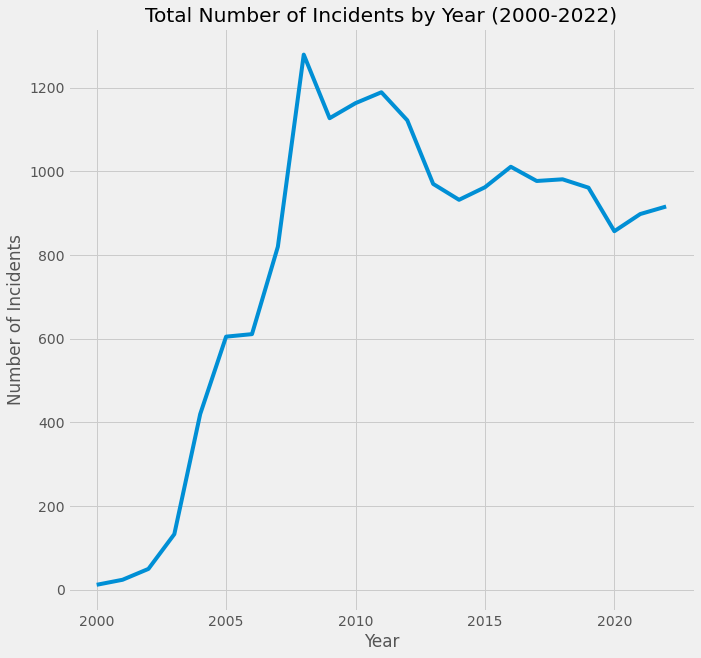

In [80]:
# df of the incidents after the year 2000
df_2000 = df[df['Year'] >= 2000].copy()

df_2000['Year'].value_counts().sort_index().plot(kind='line', figsize=(10, 10))
plt.title('Total Number of Incidents by Year (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents');

<AxesSubplot:>

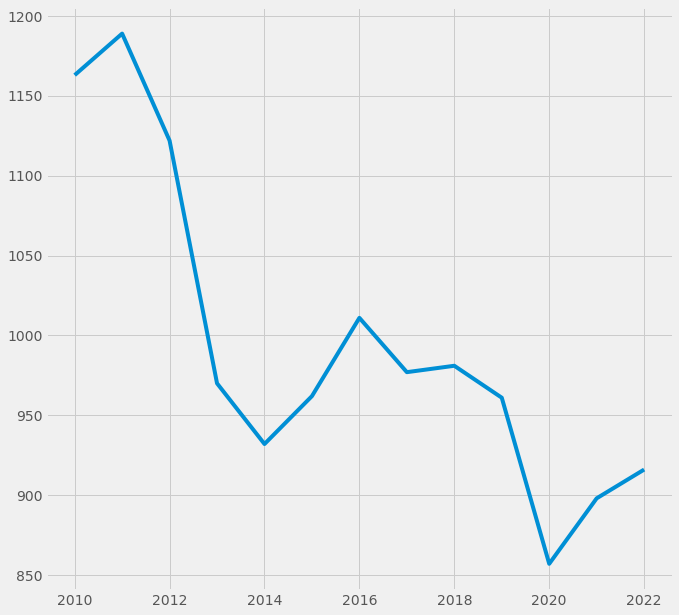

In [81]:
df_2010 = df[df['Year'] >= 2010].copy()
df_2010['Year'].value_counts().sort_index().plot(kind='line', figsize=(10, 10))

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21121 entries, 0 to 21120
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                21121 non-null  object 
 1   Investigation.Type      21121 non-null  object 
 2   Accident.Number         21121 non-null  object 
 3   Event.Date              21121 non-null  object 
 4   Location                21121 non-null  object 
 5   Country                 21121 non-null  object 
 6   Latitude                17946 non-null  object 
 7   Longitude               17939 non-null  object 
 8   Airport.Code            14817 non-null  object 
 9   Airport.Name            15226 non-null  object 
 10  Injury.Severity         21040 non-null  object 
 11  Aircraft.damage         20642 non-null  object 
 12  Aircraft.Category       21121 non-null  object 
 13  Registration.Number     21114 non-null  object 
 14  Make                    21121 non-null